<h1> Gráficas de Frontera de Decisión</h1>

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

<h2>Cargando los datos</h2>

In [309]:
df=pd.read_csv("data\iris_dataset.csv")

<h2>Preprocesando los datos</h2>

In [310]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
print(le.classes_) #Visualizar los tipos de clases.

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


    Ingresaremos en el data set una nueva columna con la nueva codificacion de las clases

In [311]:
df['clases']=le.transform(df['Class'].values)
df #Visualizar la data con la columna nueva.

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,clases
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [312]:
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(df[['PetalLength','PetalWidth']], df['clases'], test_size=0.3,random_state=30)
#Random_state es para que en cada corrida saque la misma data.

In [313]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_entranamiento_std=sc.fit_transform(X_entrenamiento)
X_prueba_std=sc.transform(X_prueba)

    Combinaremos la data de entrenamiento y de prueba en un solo arreglo.

In [314]:
X_combinado_std=np.vstack((X_entranamiento_std,X_prueba_std)) #Concatenamos los datos de manera vertical
y_combinado=np.hstack((y_entrenamiento,y_prueba))

<h2>Crear funcion de colores aleatorios y de marcadores aleatorios"</h2>

In [315]:
def colores_aleatorio(x):
    from random import randint
    colores = []
    for i in range(x):
        colores.append('#%06X' % randint(0, 0xFFFFFF))
    return colores
def marcadores_aleatorios(x):
    from random import sample
    lista_marcadores=[".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|",5,6,7,8,9,10,11]
    marcadores=[] 
    index=sample(lista_marcadores,x)
    for i in range(x):
        marcadores.append(index[i])
    return marcadores 

<h2>Crear función para graficar</h2>

In [316]:
def regiones_a_plotear(X,y,clasificador,numerodepuntosenlamalla=250,limites=1):
    #Caso de solo dos variables
    #Zona a plotear
    x1min, x1max = X[:,0].min() -limites, X[:,0].max() + limites
    x2min, x2max = X[:,1].min() -limites, X[:,1].max() + limites
    
    #Malla de puntos a plotear
    xx1, xx2 = np.meshgrid(np.linspace(x1min,x1max,numerodepuntosenlamalla),np.linspace(x2min,x2max,numerodepuntosenlamalla))
    #Arreglo para dibujar el contorno del grafico de frontera de decisión
    arreglo=np.array([xx1.ravel(), xx2.ravel()]).T
    #Clasificando los valores
    salida=clasificador.predict(arreglo)
    #Reacomodaremos las forma del arreglo salida, para que tenga la misma forma que xx1 y xx2
    salida=salida.reshape(xx1.shape) 
    
    #Graficar el contorno 
    plt.figure(figsize=(9,9))
    plt.contourf(xx1,xx2,salida,alpha=0.8,cmap=plt.cm.cool)
    #Configurando el titulo y el tamaño de los ejes 
    plt.xlabel('petal length std')
    plt.ylabel('petal width std')

    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    return plt

## Graficando las regiones de la Regresión Logistica.

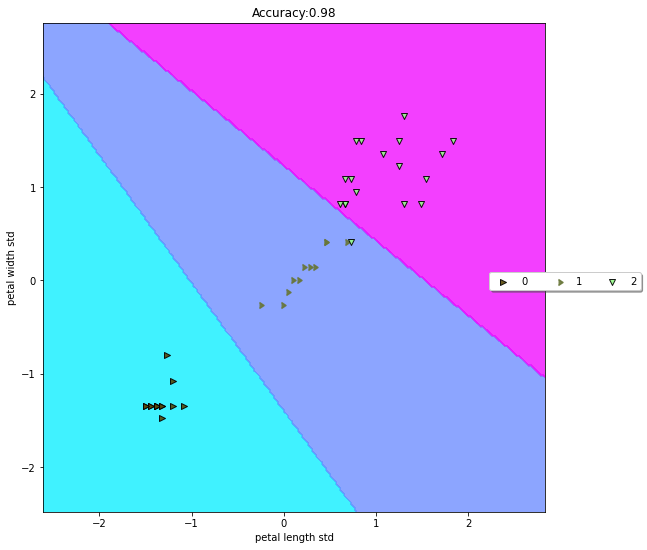

In [317]:
RL=LogisticRegression(solver='lbfgs', multi_class='auto')
RL.fit(X_entranamiento_std,y_entrenamiento)
fig=regiones_a_plotear(X_combinado_std,y_combinado,RL)
n=len(np.unique(y_prueba))
marcadores=marcadores_aleatorios(n)
colores=colores_aleatorio(n)  
for indice, clase in enumerate(np.unique(y_prueba)):
    fig.scatter(x=X_prueba_std[y_prueba==clase,0],y=X_prueba_std[y_prueba==clase,1],alpha=0.90,c=colores[indice],edgecolor='k',marker=marcadores[indice],label=clase)

from sklearn import metrics
fig.title(f"Accuracy:{np.round(metrics.accuracy_score(y_prueba, RL.predict(X_prueba_std)),2)}")    
fig.legend(loc=0,bbox_to_anchor=(1.2, 0.5), ncol=3,fancybox=True, shadow=True)
